In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#importing dataset
from sklearn.datasets import load_digits
digit = load_digits()
print("Shape of training dataset:",digit.data.shape) #1797 64*1--array, 8*8-- images
print("Shape of testing dataset:",digit.target.shape)
# In order to utilize an 8x8 figure like this, we’d have to first transform it into a feature vector with length 64.

Shape of training dataset: (1797, 64)
Shape of testing dataset: (1797,)


In [3]:
print(digit.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
digit.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
X = digit.data # independent variables matrix
y = digit.target      

In [6]:
X.shape

(1797, 64)

In [7]:
X.ndim

2

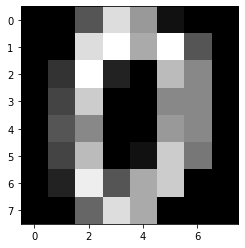

In [8]:
#plt.figure(figsize=(2,2))
plt.imshow(X[0].reshape(8,8),cmap='gray')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,
                                                random_state=10)

In [10]:
X_train.shape

(1437, 64)

In [11]:
test = X_test[0]
test

array([ 0.,  0.,  8., 14., 16., 16.,  1.,  0.,  0.,  6., 16., 16.,  8.,
        3.,  0.,  0.,  0., 14., 14.,  1.,  0.,  0.,  0.,  0.,  0., 10.,
       15.,  4.,  0.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,
        0.,  0.,  0.,  1.,  8., 15.,  2.,  0.,  0.,  0.,  0.,  2., 13.,
       15.,  0.,  0.,  0.,  0.,  0., 10., 16.,  4.,  0.,  0.,  0.])

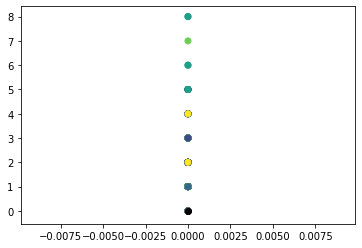

In [12]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.scatter(test[0],test[1],color='black')

In [13]:
from sklearn.model_selection import KFold,cross_val_score
kf = KFold(10,shuffle=True,random_state=10)
          # k = no. of subsets = 10

In [14]:
# Applying SVM model to training dataset
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',gamma=0.001) #hyperparameter tuning c and gamma values
#linear kernel only gives 91.8% accuracy
#polynomial kernel with degree=3 gives 86% accuracy
#sigmoid kernel gives 91.1% accuracy
#rbf kernel gives 97.816% accuracy so i used rbf kernel
model = classifier.fit(X_train,y_train)
# model = classifier.fit(X_dataset_train,train_lbl)

In [26]:
#Predicting results of training dataset
y_pred=classifier.predict(X_test)
print("Predicted output values:",y_pred)

Predicted output values: [5 2 5 4 8 2 4 3 3 0 8 7 0 1 8 6 9 7 9 7 1 8 6 7 8 8 5 3 5 9 3 3 7 3 4 1 9
 2 5 4 2 1 0 9 2 3 6 1 9 4 4 9 8 4 8 5 9 7 1 0 4 5 8 4 7 9 0 7 1 3 9 3 3 8
 0 7 3 6 5 2 0 8 8 0 1 1 2 8 8 8 2 6 3 4 7 9 8 2 9 2 5 0 8 0 4 8 8 0 6 7 3
 3 9 1 5 4 6 0 8 8 1 1 7 9 9 5 2 3 3 8 7 6 2 5 4 3 3 7 6 7 2 7 4 9 5 1 9 4
 6 1 1 1 4 0 8 9 1 2 3 5 0 3 4 1 5 4 9 3 5 6 4 0 8 6 7 0 9 9 4 7 3 5 2 0 6
 7 5 3 9 7 1 3 2 8 3 3 1 7 1 1 1 7 1 6 7 6 9 5 2 3 5 2 9 5 4 8 2 9 1 5 0 2
 3 9 0 2 0 2 1 0 5 0 6 4 2 1 9 0 9 0 6 9 4 4 9 7 5 6 1 8 7 0 8 6 2 0 1 2 3
 8 4 4 3 5 7 9 7 2 0 2 0 9 2 8 6 3 6 0 6 6 6 7 1 6 1 7 6 0 6 3 7 4 6 2 8 0
 8 4 7 3 3 0 0 2 3 9 7 4 6 7 9 7 6 0 5 6 2 7 1 0 5 1 6 4 7 2 5 1 4 6 6 5 0
 2 9 8 7 9 6 7 0 8 3 5 9 4 1 5 5 4 7 3 9 2 7 3 3 6 6 3]


In [27]:
y_pred.flatten()

array([5, 2, 5, 4, 8, 2, 4, 3, 3, 0, 8, 7, 0, 1, 8, 6, 9, 7, 9, 7, 1, 8,
       6, 7, 8, 8, 5, 3, 5, 9, 3, 3, 7, 3, 4, 1, 9, 2, 5, 4, 2, 1, 0, 9,
       2, 3, 6, 1, 9, 4, 4, 9, 8, 4, 8, 5, 9, 7, 1, 0, 4, 5, 8, 4, 7, 9,
       0, 7, 1, 3, 9, 3, 3, 8, 0, 7, 3, 6, 5, 2, 0, 8, 8, 0, 1, 1, 2, 8,
       8, 8, 2, 6, 3, 4, 7, 9, 8, 2, 9, 2, 5, 0, 8, 0, 4, 8, 8, 0, 6, 7,
       3, 3, 9, 1, 5, 4, 6, 0, 8, 8, 1, 1, 7, 9, 9, 5, 2, 3, 3, 8, 7, 6,
       2, 5, 4, 3, 3, 7, 6, 7, 2, 7, 4, 9, 5, 1, 9, 4, 6, 1, 1, 1, 4, 0,
       8, 9, 1, 2, 3, 5, 0, 3, 4, 1, 5, 4, 9, 3, 5, 6, 4, 0, 8, 6, 7, 0,
       9, 9, 4, 7, 3, 5, 2, 0, 6, 7, 5, 3, 9, 7, 1, 3, 2, 8, 3, 3, 1, 7,
       1, 1, 1, 7, 1, 6, 7, 6, 9, 5, 2, 3, 5, 2, 9, 5, 4, 8, 2, 9, 1, 5,
       0, 2, 3, 9, 0, 2, 0, 2, 1, 0, 5, 0, 6, 4, 2, 1, 9, 0, 9, 0, 6, 9,
       4, 4, 9, 7, 5, 6, 1, 8, 7, 0, 8, 6, 2, 0, 1, 2, 3, 8, 4, 4, 3, 5,
       7, 9, 7, 2, 0, 2, 0, 9, 2, 8, 6, 3, 6, 0, 6, 6, 6, 7, 1, 6, 1, 7,
       6, 0, 6, 3, 7, 4, 6, 2, 8, 0, 8, 4, 7, 3, 3,

In [28]:
np.where(y_test!=y_pred)

(array([ 58, 129, 154], dtype=int64),)

In [29]:
y_pred.shape

(360,)

In [30]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("Accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred)*100, "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

Accuracy: 99.16666666666667 

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  1  0]
 [ 0  0  0  0  0 32  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  1  0  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0  0  1 38]]


Text(0.5, 1.0, 'Predicted')

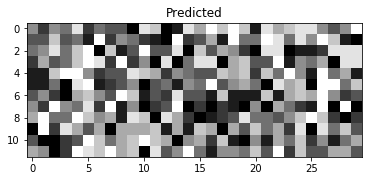

In [31]:
# Plotting some samples as well as converting into matrix
y_pred = y_pred.reshape(12,30)
plt.imshow(y_pred, cmap='gray') # to remove color channel from input image
plt.title("Predicted")

In [32]:
import joblib
joblib.dump(model, "model_digits.pkl")

['model_digits.pkl']